# Loan Prediction
## Binary Classification using Logistic Regression

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

### Importing & Loading the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery_type,RID,profit,address code,departure state
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,77095,Texas
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,48185,Michigan
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,48185,Michigan
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,48185,Michigan
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,48185,Michigan


### Dataset Info:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6700 non-null   int64  
 1   departure city   6700 non-null   object 
 2   discount         6700 non-null   float64
 3   price            6700 non-null   float64
 4   no of items      6700 non-null   int64  
 5   location         6700 non-null   object 
 6   class            6700 non-null   object 
 7   segment          6700 non-null   object 
 8   sub-class        6700 non-null   object 
 9   delivery_type    6699 non-null   object 
 10  RID              6700 non-null   int64  
 11  profit           6700 non-null   float64
 12  address code     6700 non-null   int64  
 13  departure state  6700 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 732.9+ KB


### Dataset Shape:

In [4]:
df.shape

(6700, 14)

## Data Cleaning

### Checking the Missing Values

In [5]:
df.isnull().sum()

id                 0
departure city     0
discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery_type      1
RID                0
profit             0
address code       0
departure state    0
dtype: int64

### Now, Let's drop all the missing values remaining.

In [6]:
df.dropna(inplace=True)

### Let's check the Missing values for the final time!

In [7]:
df.isnull().sum()

id                 0
departure city     0
discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery_type      0
RID                0
profit             0
address code       0
departure state    0
dtype: int64

Here, we have dropped all the missing values to avoid disturbances in the model. The Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.

### Now, Let's check the final Dataset Shape

In [8]:
df.shape

(6699, 14)

### Exploratory Data Analyis

#### Comparison between Parameters in getting the Loan:

In [9]:
df['location'].unique()

array(['Central', 'South', 'West', 'East'], dtype=object)

In [10]:
df['class'].unique()

array(['kariox', 'qexty', 'fynota'], dtype=object)

In [11]:
df['segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [12]:
df['delivery_type'].unique()



array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [13]:
df['sub-class'].unique()

array(['phone', 'headset', 'shorts', 'television', 'laptop', 'battery',
       'tshirts', 'watch', 'colddrinks', 'pants', 'lighting', 'hoodies',
       'chocolates', 'tablet', 'charger', 'sweets', 'fastfood'],
      dtype=object)

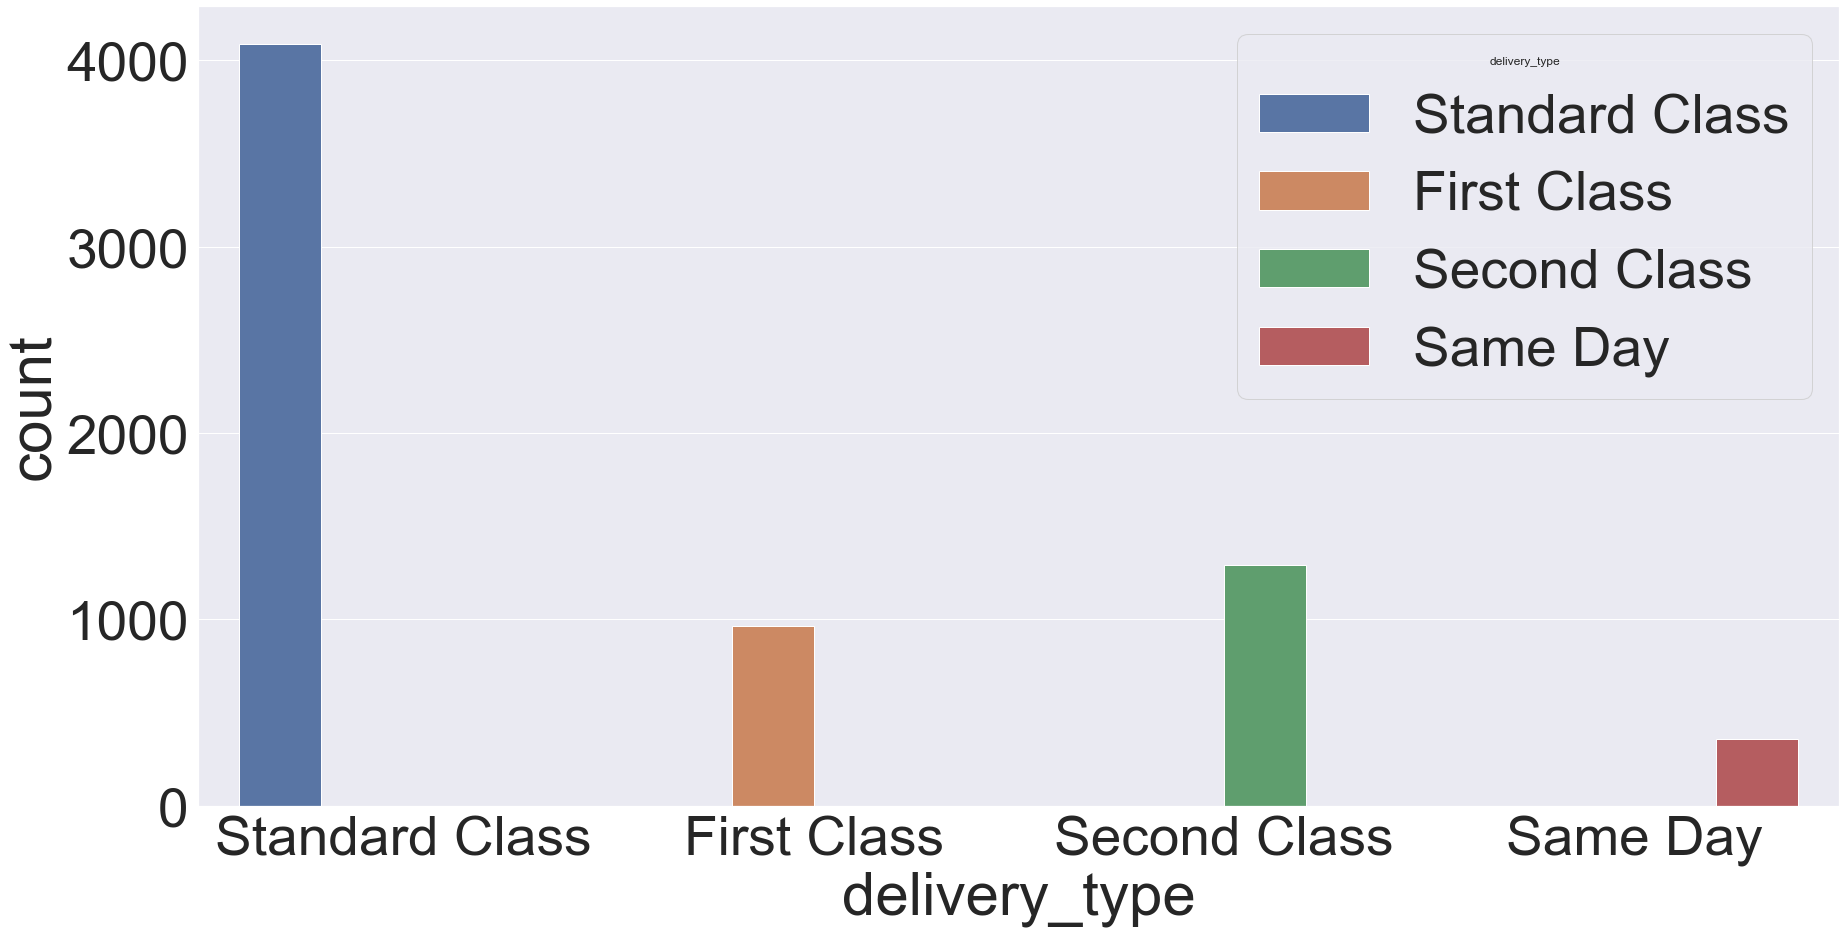

In [14]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['delivery_type'],hue=df['delivery_type'])

### Let's replace the Variable values to Numerical form & display the Value Counts

The data in Numerical form avoids disturbances in building the model. 

In [15]:
df['class'].replace('kariox',2,inplace=True)
df['class'].replace('qexty',1,inplace=True)
df['class'].replace('fynota',0,inplace=True)

In [16]:
df['class'].value_counts()

2    4033
1    1437
0    1229
Name: class, dtype: int64

In [17]:
df.segment=df.segment.map({'Home Office':0,'Corporate':1,'Consumer':2})
df['segment'].value_counts()

2    3522
1    2048
0    1129
Name: segment, dtype: int64

In [18]:
df['segment'].unique()

array([2, 1, 0], dtype=int64)

In [19]:
df.location=df.location.map({'East':0,'West':1,'South':2,'Central':3})
df['location'].value_counts()

1    2117
0    1929
3    1552
2    1101
Name: location, dtype: int64

In [20]:
df.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery_type,RID,profit,address code,departure state
0,1,Houston,0.2,16.448,2,3,2,2,phone,Standard Class,7981,5.5512,77095,Texas
1,2,Westland,0.0,29.700,5,3,2,2,headset,Standard Class,6334,13.3650,48185,Michigan
2,3,Westland,0.0,14.730,3,3,1,2,shorts,Standard Class,6333,4.8609,48185,Michigan
3,4,Westland,0.0,43.920,3,3,2,2,television,Standard Class,6332,12.7368,48185,Michigan
4,5,Westland,0.0,66.580,2,3,2,2,laptop,Standard Class,6331,15.9792,48185,Michigan


In [21]:
df.delivery_type=df.delivery_type.map({'Standard Class':0, 'First Class':1, 'Second Class':2, 'Same Day':3})
df['delivery_type'].value_counts()

0    4086
2    1290
1     966
3     357
Name: delivery_type, dtype: int64

In [22]:
df.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery_type,RID,profit,address code,departure state
0,1,Houston,0.2,16.448,2,3,2,2,phone,0,7981,5.5512,77095,Texas
1,2,Westland,0.0,29.700,5,3,2,2,headset,0,6334,13.3650,48185,Michigan
2,3,Westland,0.0,14.730,3,3,1,2,shorts,0,6333,4.8609,48185,Michigan
3,4,Westland,0.0,43.920,3,3,2,2,television,0,6332,12.7368,48185,Michigan
4,5,Westland,0.0,66.580,2,3,2,2,laptop,0,6331,15.9792,48185,Michigan


In [21]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
53.000000      1
65.000000      1
109.000000     1
156.000000     1
89.000000      1
Name: LoanAmount, Length: 195, dtype: int64

In [22]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [23]:
df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

From the above figure, we can see that **Credit_History** (Independent Variable) has the maximum correlation with **Loan_Status** (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

### Final DataFrame

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,1,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,1,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,1,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,1,6000,0.0,141.000000,360.0,1.0,2,1


### Importing Packages for Classification algorithms

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Splitting the data into Train and Test set

In [26]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

### Logistic Regression (LR)

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. 

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

#### Sigmoid Function

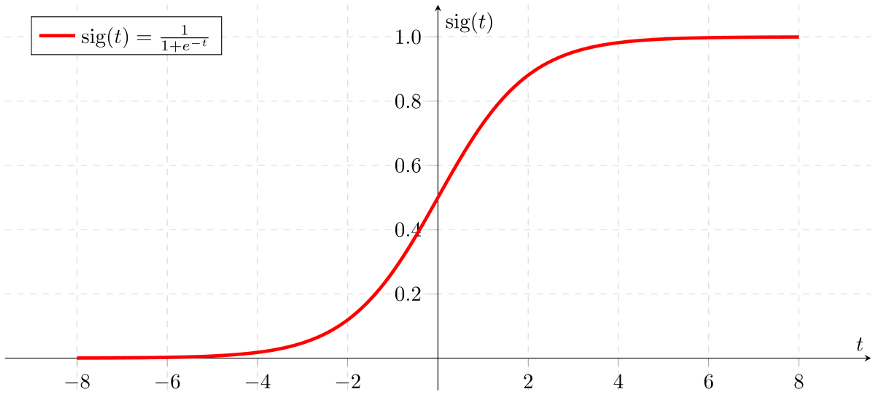

In [28]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7914110429447853


In [29]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0]
y_test [0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0]


**CONCLUSION:**

1. The Loan Status is heavily dependent on the Credit History for Predictions.
2. The Logistic Regression algorithm gives us the maximum Accuracy (79% approx) compared to the other 3 Machine Learning Classification Algorithms.